In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
import folium
from folium.plugins import HeatMap
from folium import plugins

In [10]:
gdf = gpd.read_file('./Maps/mapa_energetico_abc.json')

df = pd.read_excel('./Maps/irradiaçao_brasil.xlsx')

irradiacao_media = df[['LATITUDE', 'LONGITUDE', 'ANNUAL']].values.tolist()

gdf

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,ANNUAL,geometry
0,3513801,Diadema,SP,30.732,4.37,"POLYGON ((-46.57962 -23.68247, -46.57966 -23.6..."
1,3529401,Mauá,SP,61.937,4.27,"POLYGON ((-46.44319 -23.69682, -46.44345 -23.6..."
2,3543303,Ribeirão Pires,SP,98.972,4.27,"POLYGON ((-46.35344 -23.6472, -46.35325 -23.64..."
3,3544103,Rio Grande da Serra,SP,36.341,4.25,"POLYGON ((-46.36625 -23.75326, -46.3667 -23.75..."
4,3547809,Santo André,SP,175.782,4.33,"POLYGON ((-46.51748 -23.72165, -46.51742 -23.7..."
5,3548708,São Bernardo do Campo,SP,409.532,4.33,"POLYGON ((-46.62295 -23.7932, -46.62289 -23.78..."
6,3548807,São Caetano do Sul,SP,15.331,4.41,"POLYGON ((-46.55649 -23.61201, -46.55649 -23.6..."


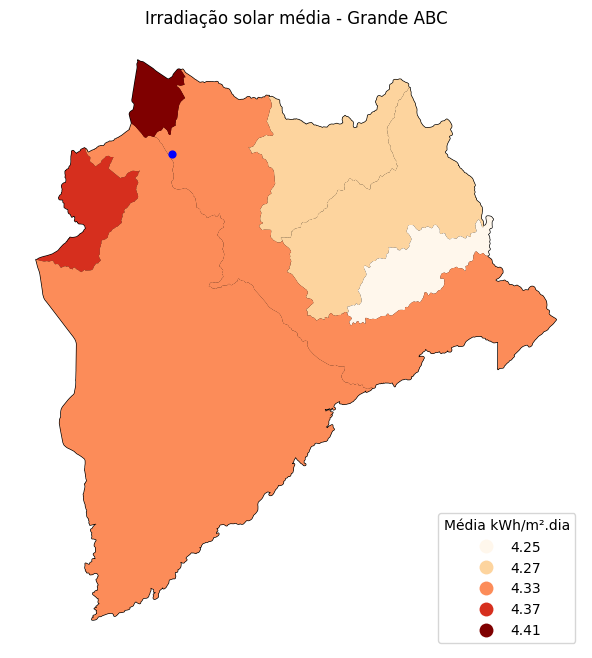

In [28]:
fsa_lat = -23.661280
fsa_lon = -46.554371

point = gpd.GeoSeries([Point(fsa_lon, fsa_lat)], crs=gdf.crs)

fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, facecolor='white', edgecolor='black')
gdf.plot(column='ANNUAL', ax=ax, legend=True, cmap='OrRd')

point.plot(ax=ax, color='blue', markersize=24, label='FSA')

legend = ax.get_legend()
legend.set_title('Média kWh/m².dia')
legend.set_bbox_to_anchor((1, 0.23))

ax.set_title('Irradiação solar média - Grande ABC')

ax.set_axis_off()
plt.show()


In [20]:
mapa_fsa = folium.Map(
    location= [-23.661280, -46.554371],
    zoom_start=17
)

mapa_fsa.add_child(folium.LatLngPopup())

folium.Marker(
    [-23.661280, -46.554371],
    popup="Centro Universitário Fundação Santo André"
).add_to(mapa_fsa)

In [13]:
mapa_fsa